In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [2]:
# Load the datasets

train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test.shape

(5681, 11)

In [7]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
train.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)

In [9]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)

## Exploring the Data

In [12]:
# Getting numeric and categorical columns

train_num_cols = train._get_numeric_data().columns 
train_cat_cols = train.columns.difference(train_num_cols)

print("Numeric columns: ", train_num_cols)
print()
print("Categorical columns: ", train_cat_cols)

Numeric columns:  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

Categorical columns:  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object')


In [14]:
train['Outlet_Establishment_Year'].nunique()

9

In [15]:
# Lets visualize the distribution of numerical data

data_num = train.select_dtypes(include = np.number)
data_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [16]:
data_num.drop('Outlet_Establishment_Year', axis = 1, inplace = True)

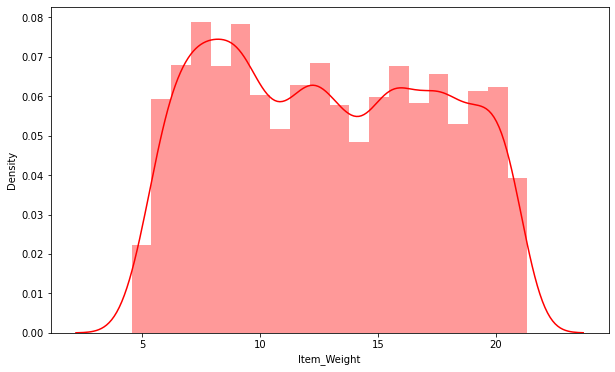

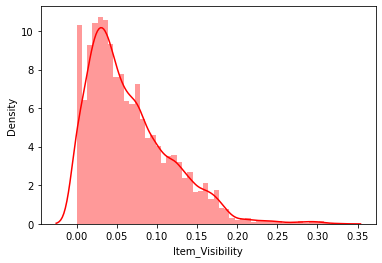

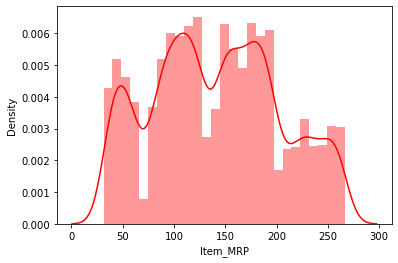

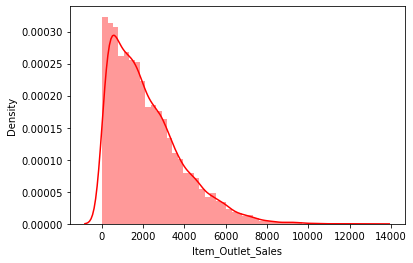

In [18]:
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.distplot(train[i], color = 'red')
    plt.show()

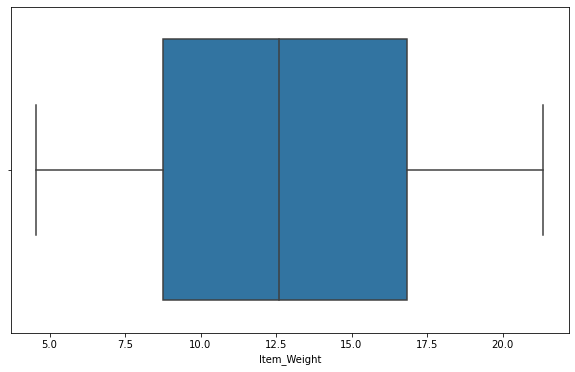

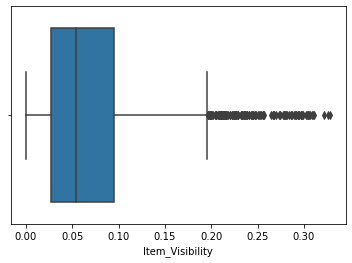

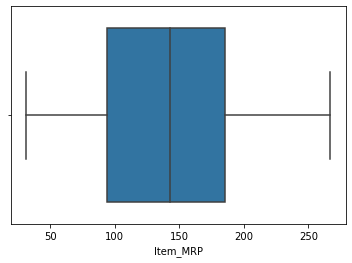

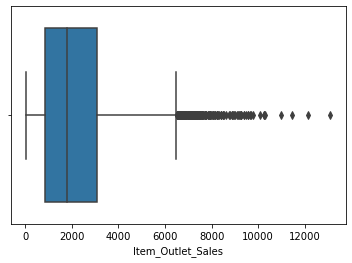

In [20]:
# Checking for an outliers

plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.boxplot(train[i])
    plt.show()

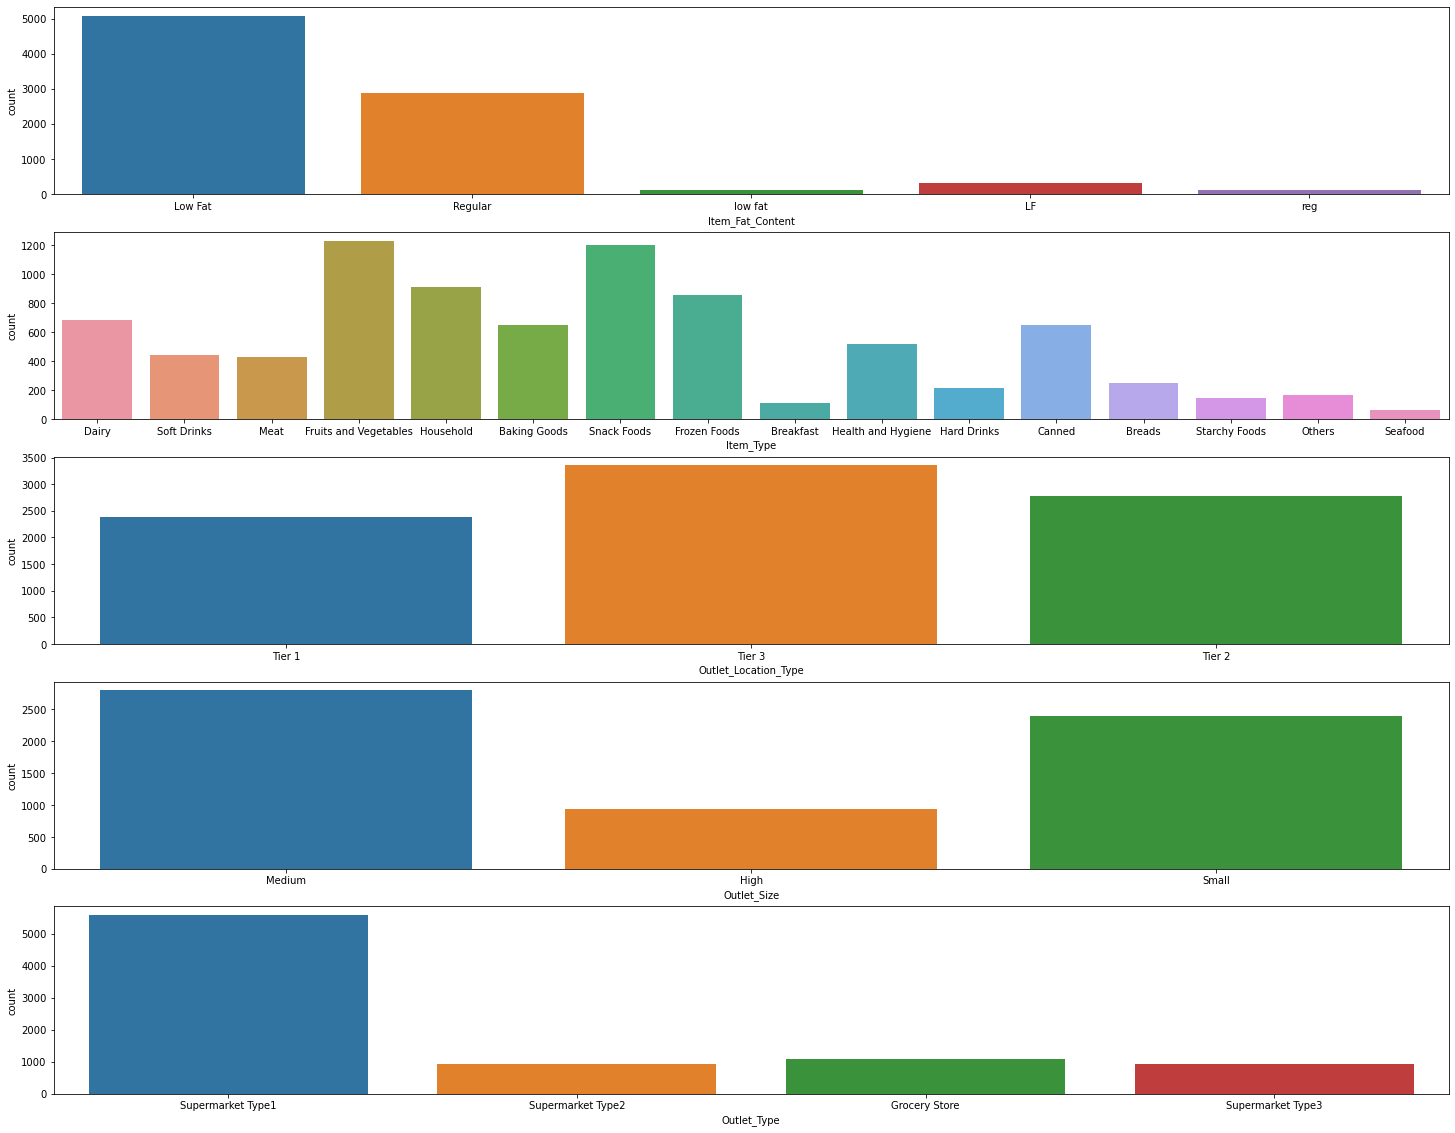

In [24]:
## Analyzing categorical data


fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(25, 20))

cols_ = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type']

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=train, ax=ax[ind])

## Feature Engineering

In [29]:
# Checking for missing values

train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [27]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace = True)
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace = True)

In [28]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace = True)
test['Item_Weight'].fillna(test['Item_Weight'].median(), inplace = True)

In [31]:
# Storing target value in 'Target' attribute for further usage

Target = pd.DataFrame(train['Item_Outlet_Sales'])

In [32]:
# Dropping unwanted columns 

train = train.drop(['Item_Outlet_Sales'], axis = 1)

print("Shape of train data:", train.shape)
print("Shape of test data:", test.shape)

Shape of train data: (8523, 9)
Shape of test data: (5681, 9)


In [33]:
# Concat both sets to data file

data = pd.concat([train, test])
data.shape

(14204, 9)

In [35]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1


In [36]:
# Modify Item Fat Content variables

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat': 'Low Fat',
                                                            'LF': 'Low Fat',
                                                            'reg': 'Regular'})

data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [37]:
# Outlier Treatment for ApplicantIncome

Q1 = data.Item_Visibility.quantile(0.25)
Q3 = data.Item_Visibility.quantile(0.75)

IQR = Q3 - Q1
data = data[(data.Item_Visibility >= Q1 - 1.5*IQR) & (data.Item_Visibility <= Q3 + 1.5*IQR)]

<AxesSubplot:xlabel='Item_Visibility'>

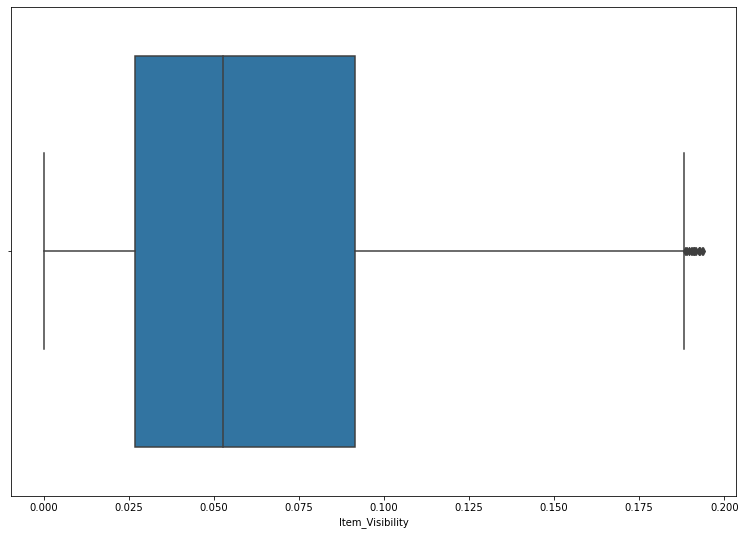

In [38]:
plt.figure(figsize = (13, 9))
sns.boxplot(data['Item_Visibility'])

In [40]:
data['Item_Type'].nunique()

16

In [42]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    13943.000000
mean        15.047551
std          8.354605
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [43]:
# Handle Categorical data

from sklearn.preprocessing import LabelEncoder

feature_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']
le = LabelEncoder()
for x in feature_cols:
    data[x] = le.fit_transform(data[x])

In [44]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,14
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,4
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,14
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,15
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,26


In [45]:
data.drop('Outlet_Establishment_Year', axis = 1, inplace = True)

In [46]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,9.30,0,0.016047,4,249.8092,1,0,1,14
1,5.92,1,0.019278,14,48.2692,1,2,2,4
2,17.50,0,0.016760,10,141.6180,1,0,1,14
3,19.20,1,0.000000,6,182.0950,1,2,0,15
4,8.93,0,0.000000,9,53.8614,0,2,1,26


## Feature Selection 

In [47]:
data_num

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


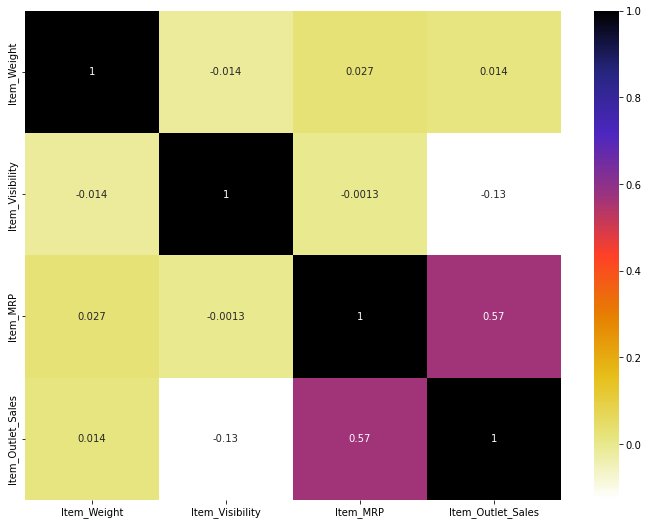

In [48]:
# Analyze the relation between dependent and independent variable using Correlation Matrix / Heatmap

plt.figure(figsize = (12, 9))
cor = data_num.corr()
sns.heatmap(cor, annot = True, cmap = 'CMRmap_r')
plt.show()

In [53]:
## OLS Model with numerical data only

import statsmodels.formula.api as smf
lm = smf.ols(formula='Item_Outlet_Sales ~ Item_Weight+Item_Visibility+Item_MRP',data=data_num).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1518.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:35:16   Log-Likelihood:                -60046.
No. Observations:                7060   AIC:                         1.201e+05
Df Residuals:                    7056   BIC:                         1.201e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         146.1622     55.714      2.623      0.009      36.947     255.378
Item_Weight        -1.2770      3.066     -0.416      0.677      -7.288       4.734
Item_Visibility -2574.2083    292.711     -8.794      0.000   -3148.009   -2000.407
Item_MRP           15.2473      0.228     66.841      0.000      14.800      15.694
==============================================================================
Omnibus:                      356.713   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.391
Skew:                           0.360   Prob(JB):                    1.66e-156
Kurtosis:                       4.386   Cond. No.                     3.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = data.columns

In [55]:
vif

,VIF,Features
0,7.800086,Item_Weight
1,1.539672,Item_Fat_Content
2,2.827172,Item_Visibility
3,3.749389,Item_Type
4,5.493685,Item_MRP
5,5.266753,Outlet_Size
6,4.847903,Outlet_Location_Type
7,4.662515,Outlet_Type
8,3.970048,Outlet_Years


In [56]:
data.drop(['Item_Weight', 'Item_Visibility'], axis = 1, inplace = True)

In [57]:
data.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,0,4,249.8092,1,0,1,14
1,1,14,48.2692,1,2,2,4
2,0,10,141.6180,1,0,1,14
3,1,6,182.0950,1,2,0,15
4,0,9,53.8614,0,2,1,26


In [58]:
data.shape

(13943, 7)

In [59]:
Target.shape

(8523, 1)

In [61]:
# Splitting back the data into train and test

train_new = data.iloc[:8523,]
test_new = data.iloc[8524:,]

print("Shape of train data:", train_new.shape)
print("Shape of test data:", test_new.shape)

Shape of train data: (8523, 7)
Shape of test data: (5419, 7)


In [62]:
# Split the dataset into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_new,Target,test_size=0.2,random_state=42)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6818, 7), (1705, 7), (6818, 1), (1705, 1))

## Model Building & Evaluation

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
# Fit the data on model

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [66]:
# Make a prediction

y_pred = lin_reg.predict(X_test)

In [71]:
# Check the performance

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1321.6865293258204
RMSE: 1652.3124116026202


<AxesSubplot:ylabel='Density'>

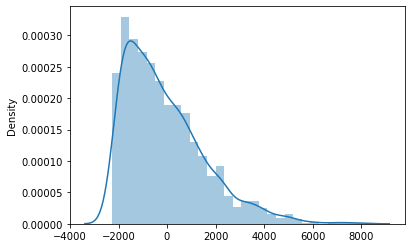

In [68]:
import seaborn as sns
sns.distplot(y_test-y_pred)

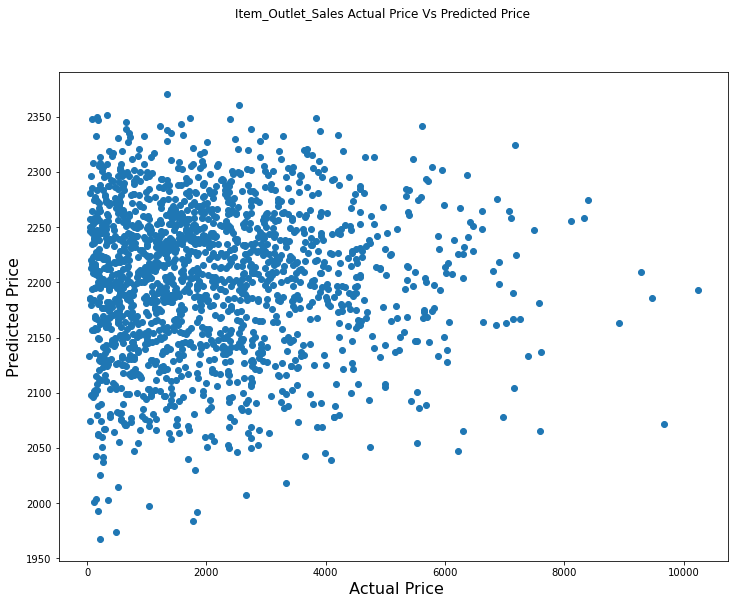

In [70]:
#Plot the scatter plot for the error term
fig=plt.figure(figsize=(12,9))
plt.scatter(y_test, y_pred)
plt.xlabel(' Actual Price',fontsize=16)
plt.ylabel('Predicted Price',fontsize=16)
plt.suptitle('Item_Outlet_Sales Actual Price Vs Predicted Price')

plt.show()